<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [4]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores.sample(3)


,StudentID,Method,Score
13,14,A,78
18,19,B,85
44,45,C,71


Calculate the number of students in each teaching method.

In [6]:
df_exam_scores.groupby("Method")["StudentID"].count()

Method
A    17
B    17
C    16
Name: StudentID, dtype: int64

Compute the mean and standard deviation of exam scores for each group.

In [10]:
print("MEAN")
print(df_exam_scores.groupby("Method")["Score"].mean())

print("\n STD")
print(df_exam_scores.groupby("Method")["Score"].std())

MEAN
Method
A    78.588235
B    86.294118
C    71.937500
Name: Score, dtype: float64

 STD
Method
A    2.575336
B    2.365500
C    1.768945
Name: Score, dtype: float64


Use a plot to show the exam scores by teaching method.

<Axes: title={'center': 'Score'}, xlabel='Method'>

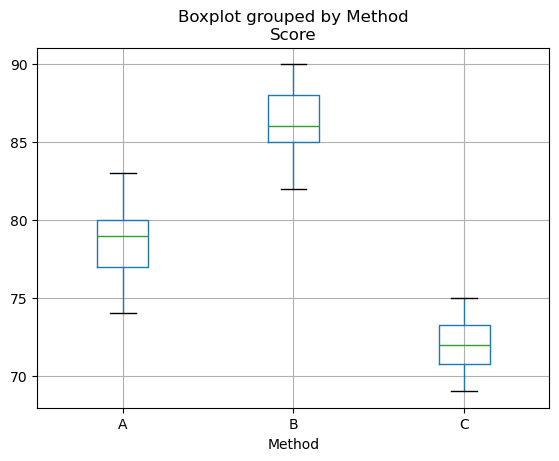

In [ ]:
df_exam_scores.boxplot(column="Score", by="Method")


Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [22]:
a = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
b = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
c = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(a, b, c)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if (p_value >= 0.05):
    print("H0 accepted with p_value of: ", p_value)
else:
    print("H0 rejected with p_value of: ", p_value)

F-statistic: 165.1785
P-value: 0.0000
H0 rejected with p_value of:  5.5032645988699085e-22


Interpret the results. What does it say about the relationship between teaching method and exam scores?

- #### The one way anova results (F = 165.18, p < 0.001) indicate a statistically significant difference in exam scores across methods [A, B, C], suggesting that the teaching method strongly influences performance. Therefore, a null hypothesis that all methods would produce the same mean exam score is rejected.

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [25]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data.sample(3)

,ID,Gender,Litter
39,40,Female,No
30,31,Female,No
4,5,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [27]:
print("GENDER: ")
print(df_littering_data['Gender'].value_counts())

print("\nLITTER: ")
print(df_littering_data['Litter'].value_counts())

GENDER: 
Gender
Male      20
Female    20
Name: count, dtype: int64

LITTER: 
Litter
No     22
Yes    18
Name: count, dtype: int64


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [28]:
ct = pd.crosstab(
    df_littering_data['Litter'],
    df_littering_data['Gender'],

)

ct

Gender,Female,Male
Litter,,
No,14,8
Yes,6,12


- #### There are 20 Female and 20 Males. No Litter is 14 and 8 for Female and Male respectively. While Yes Litter is 6 and 12 for Female and Male respectively

State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

- #### Null Hypothesis H0: There is no association between gender and littering behavior. The two features are independent
- #### Alternative Hypothesis H1: There is an association between gender and littering behavior. The two features are not independent

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

In [29]:
chi2, p_value, dof, expected = chi2_contingency(ct)
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 2.525252525252525
P-value: 0.11203684368556356
Degrees of freedom: 1
Expected frequencies table:
[[11. 11.]
 [ 9.  9.]]


Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [30]:
if (p_value >= 0.05):
    print("H0 accepted with p_value of: ", p_value)
else:
    print("H0 rejected with p_value of: ", p_value)

H0 accepted with p_value of:  0.11203684368556356


Interpret your results. Is there evidence that gender and littering behavior are associated?

- #### The p-value is greater than 0.05, therefore, accepting the null hypothesis that gender and littering behaviour are independent.